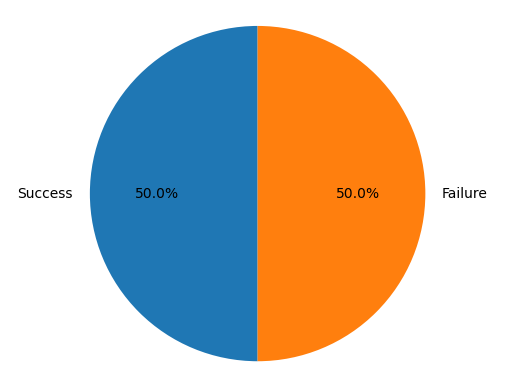

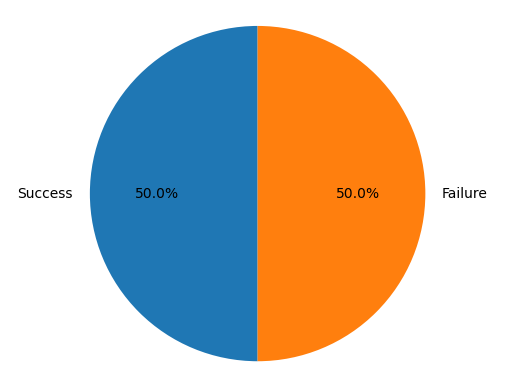

In [1]:
# probability_gui.py

import tkinter as tk
from tkinter import ttk, messagebox
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# --- Probability Functions ---
def probability_event(success, total):
    if total <= 0:
        raise ValueError("Total trials must be greater than zero.")
    return success / total

def conditional_probability(intersection, given):
    if given <= 0:
        raise ValueError("Given event count must be greater than zero.")
    return intersection / given

# --- Plotting Function ---
def plot_probability(success, total):
    fail = total - success
    labels = ["Success", "Failure"]
    sizes = [success, fail]
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
    ax.axis("equal")
    return fig

# --- GUI Code ---
class ProbabilityApp:
    def __init__(self, master):
        self.master = master
        master.title("Probability Calculator")
        
        # Input fields
        ttk.Label(master, text="Number of successes:").grid(row=0, column=0, sticky="w")
        self.success_entry = ttk.Entry(master)
        self.success_entry.grid(row=0, column=1)
        
        ttk.Label(master, text="Total trials:").grid(row=1, column=0, sticky="w")
        self.total_entry = ttk.Entry(master)
        self.total_entry.grid(row=1, column=1)
        
        # Buttons
        ttk.Button(master, text="Calculate Probability", command=self.calculate_probability).grid(row=2, column=0, columnspan=2, pady=10)
        
        # Placeholder for matplotlib plot
        self.canvas_frame = ttk.Frame(master)
        self.canvas_frame.grid(row=3, column=0, columnspan=2)

    def calculate_probability(self):
        try:
            success = int(self.success_entry.get())
            total = int(self.total_entry.get())
            prob = probability_event(success, total)
            messagebox.showinfo("Result", f"Probability: {prob:.2f}")
            
            fig = plot_probability(success, total)
            canvas = FigureCanvasTkAgg(fig, master=self.canvas_frame)
            canvas.get_tk_widget().grid(row=0, column=0)
            canvas.draw()
        except Exception as e:
            messagebox.showerror("Error", str(e))

# --- Main Execution ---
if __name__ == "__main__":
    root = tk.Tk()
    app = ProbabilityApp(root)
    root.mainloop()
